In [15]:
import cameratransform as ct
import drawSvg as draw
from math import sin, cos, pi, asin
import numpy as np
from opensimplex import OpenSimplex

In [16]:
default_cam = ct.Camera(ct.RectilinearProjection(image=(800, 800)),
                        ct.SpatialOrientation(pos_y_m=-4000, elevation_m=-3500, tilt_deg=135))
gen = OpenSimplex(seed=123)

In [17]:
def boo(r=300, n=360, yn=80, length=3, cam=default_cam, deviance=(-50, 0),
        radial_noise_r=2, radial_noise_coeff=.2, sag_noise_r=4, sag_noise_coeff=0.5, radial_offset=0.3, seed=123):
    gen = OpenSimplex(seed=seed)
    canvas = draw.Drawing(800, 800, center='origin', displayInline=False)
    canvas.append(draw.Rectangle(0, 0, 800, 800, fill='black'))
    rings = []
    sag_noise = []
    radial_noise = []
    for i in range(n):
        theta = i/n * 2*pi
        x,y = cos(theta), sin(theta)
        radial_noise.append((radial_offset + gen.noise2d(radial_noise_r*x, radial_noise_r*y))/2)
        sag_noise.append((1 + gen.noise2d(sag_noise_r*x, sag_noise_r*y))/2)
    llength = length * r -r + pi/2*r
    for vy in np.arange(0, llength, llength/yn):
        if vy > pi*r/2:
            y = r + vy - pi*r/2
        else:
            thetop = vy / r
            y = r - r*cos(thetop)
        noise_interp = r * max(y - r, 0) / ((length-1)*r)
        sag_interp = r * y / (length * r)
        sag_scalar = sag_noise_coeff * sag_interp
        radial_noise_scalar = radial_noise_coeff * noise_interp
        ring = []
        yp = max(r - y, 0)
        yr = cos(asin(yp/r)) * r
#         print(y, yp)
        if yr < 10:
            continue
        for i in range(n):
            d = (noise_interp/r)**2
            theta = i/n * 2*pi
            curr_y = y + d*sag_scalar * sag_noise[i]
            yr = cos(asin(yp/r)) * r
            curr_r = yr + radial_noise_scalar * radial_noise[i]
            ring.append((
                curr_r*cos(theta)+d*deviance[0], 
                curr_r*sin(theta)+d*deviance[1], 
                curr_y
            ))
        rings.append(cam.imageFromSpace(ring).flatten())
    
    for ring in rings:
        canvas.append(draw.Lines(*ring, close=True, fill='none', stroke='white'))
        canvas.setPixelScale(.4)
    display(canvas.rasterize())

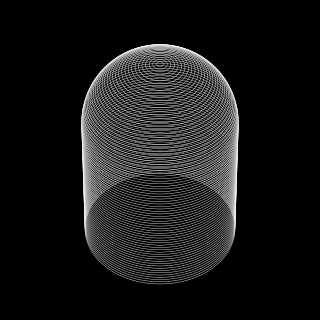

In [18]:
boo(r=300, n=360, yn=80, length=3, cam=default_cam, deviance=(0, 0),
        radial_noise_r=0, radial_noise_coeff=.2, sag_noise_r=4, sag_noise_coeff=0., radial_offset=0.3)

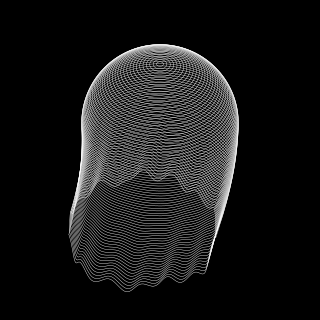

In [19]:
boo(r=300, n=360, yn=80, length=2.8, cam=default_cam, deviance=(-80, 0),
        radial_noise_r=2, radial_noise_coeff=.2, sag_noise_r=4, sag_noise_coeff=0.5, radial_offset=0.3)

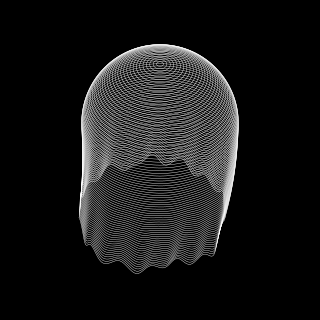

In [20]:
boo(r=300, n=360, yn=80, length=2.8, cam=default_cam, deviance=(-40, 100),
        radial_noise_r=2, radial_noise_coeff=.2, sag_noise_r=4, sag_noise_coeff=0.5, radial_offset=0.3)

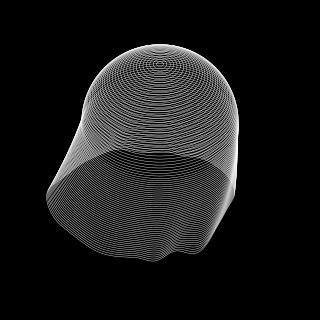

In [21]:
boo(r=300, n=360, yn=80, length=2.8, cam=default_cam, deviance=(-40, 100),
        radial_noise_r=1, radial_noise_coeff=1, sag_noise_r=2, sag_noise_coeff=0.5, radial_offset=0.3)

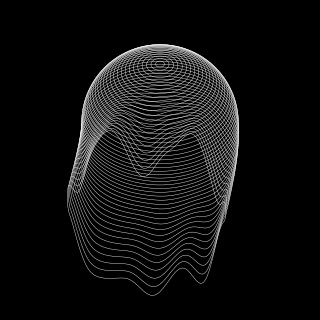

In [22]:
boo(r=300, n=360, yn=50, length=2.2, cam=default_cam, deviance=(-60, 120),
        radial_noise_r=.001, radial_noise_coeff=1., sag_noise_r=2, sag_noise_coeff=2, radial_offset=.2)

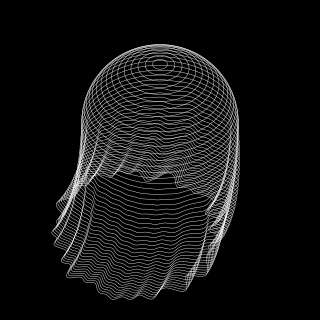

In [23]:
boo(r=300, n=900, yn=50, length=4, cam=default_cam, deviance=(-120, 240),
        radial_noise_r=6, radial_noise_coeff=0.4, sag_noise_r=0.01, sag_noise_coeff=0, radial_offset=1)

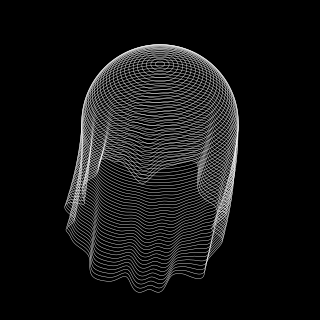

In [24]:
boo(r=300, n=360, yn=60, length=2.8, cam=default_cam, deviance=(-60, 120),
        radial_noise_r=5, radial_noise_coeff=0.3, sag_noise_r=2, sag_noise_coeff=1, radial_offset=0.3)

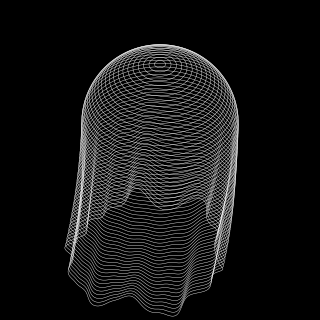

In [25]:
boo(r=300, n=480, yn=60, length=3.5, cam=default_cam, deviance=(-60, 120),
        radial_noise_r=4, radial_noise_coeff=0.3, sag_noise_r=2, sag_noise_coeff=0.7, radial_offset=0.65, seed=0)

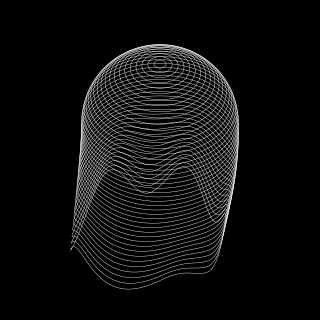

In [29]:
boo(r=300, n=360, yn=45, length=2.8, cam=default_cam, deviance=(-60, 120),
        radial_noise_r=.001, radial_noise_coeff=1., sag_noise_r=1.4, sag_noise_coeff=1.7, radial_offset=.2, seed=123)

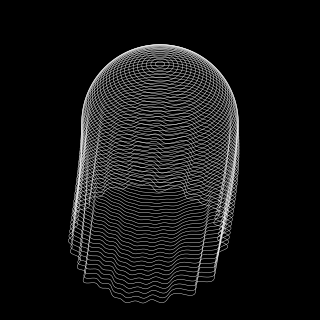

In [27]:
boo(r=300, n=900, yn=60, length=2.8, cam=default_cam, deviance=(-60, 120),
        radial_noise_r=6, radial_noise_coeff=0.3, sag_noise_r=0.01, sag_noise_coeff=1.8, radial_offset=.7)

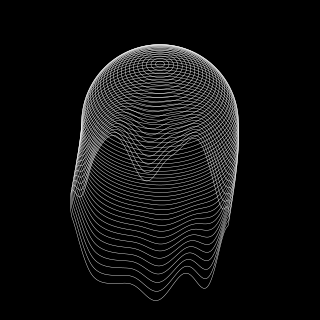

In [28]:
boo(r=300, n=480, yn=50, length=2.2, cam=default_cam, deviance=(-45, 90),
        radial_noise_r=.001, radial_noise_coeff=1., sag_noise_r=2, sag_noise_coeff=2, radial_offset=.2)